<a href="https://colab.research.google.com/github/Ananya45678/Machine-Learning-Codes/blob/main/ML_lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ml_Lab_8_Customer_Data.xlsx to Ml_Lab_8_Customer_Data.xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wine_data.csv to wine_data (1).csv


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**QUESTION 1.**

. Write your own functions for the following modules:
a) Summation unit
b) Activation Unit – Step, Bipolar Step, Sigmoid, TanH, ReLU and Leaky ReLU functions
c) Comparator unit for Error calculation

In [ ]:
def summation_unit(inputs, weights, bias=0):
    return sum(i * w for i, w in zip(inputs, weights)) + bias

def step_function(x):
    return 1 if x >= 0 else 0

def bipolar_step_function(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def tanh(x):
    return math.tanh(x)

def relu(x):
    return max(0, x)

def leaky_relu(x, alpha=0.01):
    return x if x >= 0 else alpha * x

def error_calculator(predicted, actual):
    return actual - predicted

x = [0.5, 0.2, 0.9]
w = [0.4, -0.3, 0.8]
bias = 0.1

sum_result = summation_unit(x, w, bias)
activated_output = relu(sum_result)
actual_output = 1
error = error_calculator(activated_output, actual_output)

print("Summation:", sum_result)
print("Activated:", activated_output)
print("Error:", error)

Summation: 0.9600000000000001
Activated: 0.9600000000000001
Error: 0.039999999999999925


**QUESTION 2.**

Develop the above perceptron in your own code (don’t use the perceptron model available from
package). Use the initial weights as provided below.
W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05
Write a function for Activation function. Develop & Use the code for Step activation function to learn
the weights of the network to implement above provided AND gate logic. The activation function is
demonstrated below.
Identify the number of epochs needed for the weights to converge in the learning process. Make a
plot of the epochs against the error values calculated (after each epoch, calculate the sum-squareerror against all training samples).
(Note: Learning is said to be converged if the error is less than or equal to 0.002. Stop the learning
after 1000 iterations if the convergence error condition is not met.)


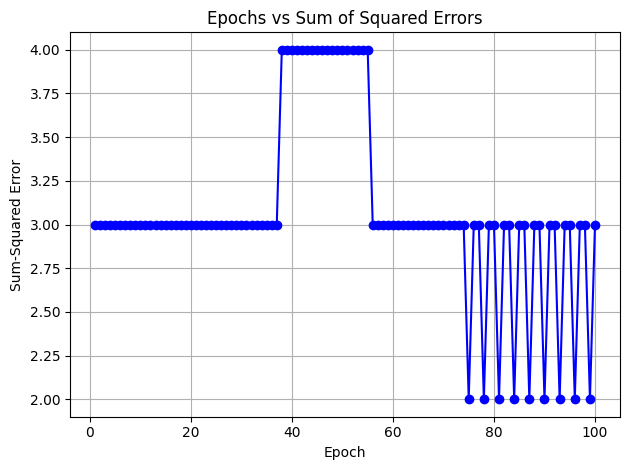

([0.8499999999999925, -0.75, -0.7999999999999998], 100)

In [ ]:
def step_activation(x):
    return 1 if x >= 0 else 0

def train_perceptron(learning_rate=0.05, max_epochs=100):
    inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
    targets = [0, 0, 0, 1]
    w = [10, 0.2, -0.75]
    epoch_errors = []
    epoch_count = 0

    while epoch_count < max_epochs:
        total_error = 0
        for x, target in zip(inputs, targets):
            weighted_sum = w[0] + w[1]*x[0] + w[2]*x[1]
            output = step_activation(weighted_sum)
            error = target - output
            total_error += error ** 2

            w[0] += learning_rate * error
            w[1] += learning_rate * error * x[0]
            w[2] += learning_rate * error * x[1]

        epoch_errors.append(total_error)
        epoch_count += 1

        if total_error == 0:
            break

    return w, epoch_errors, epoch_count

final_weights, errors, epochs = train_perceptron()

plt.plot(range(1, epochs + 1), errors, marker='o', color='blue')
plt.title("Epochs vs Sum of Squared Errors")
plt.xlabel("Epoch")
plt.ylabel("Sum-Squared Error")
plt.grid(True)
plt.tight_layout()
plt.show()

final_weights, epochs

**QUESTION 3.**

. Repeat the above A1 experiment with following activation functions (write your own code for
activation functions). Compare the iterations taken to converge against each of the activation
functions. Keep the learning rate same as A1.
• Bi-Polar Step function
• Sigmoid function
• ReLU function

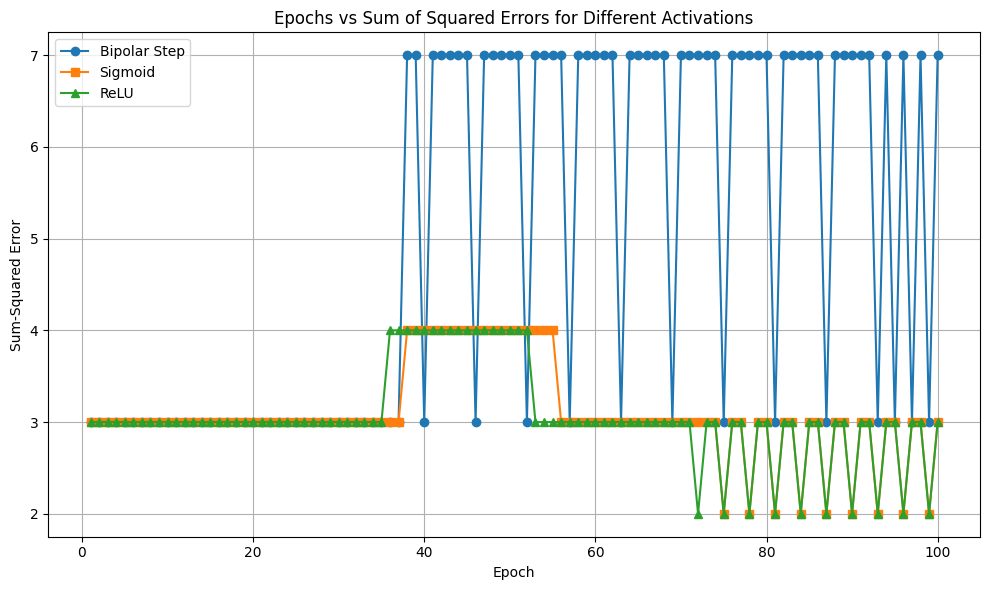

(100, 100, 100)

In [ ]:
def bipolar_step(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

def train_perceptron_custom_activation(activation_fn, threshold_fn=None, learning_rate=0.05, max_epochs=100):
    inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
    targets = [0, 0, 0, 1]
    w = [10, 0.2, -0.75]
    epoch_errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for x, target in zip(inputs, targets):
            weighted_sum = w[0] + w[1]*x[0] + w[2]*x[1]
            activated_output = activation_fn(weighted_sum)
            output = activated_output
            if threshold_fn:
                output = threshold_fn(activated_output)

            error = target - output
            total_error += error ** 2

            w[0] += learning_rate * error
            w[1] += learning_rate * error * x[0]
            w[2] += learning_rate * error * x[1]

        epoch_errors.append(total_error)
        if total_error == 0:
            break

    return w, epoch_errors, epoch + 1

bipolar_w, bipolar_errors, bipolar_epochs = train_perceptron_custom_activation(activation_fn=bipolar_step)
sigmoid_w, sigmoid_errors, sigmoid_epochs = train_perceptron_custom_activation(activation_fn=sigmoid, threshold_fn=lambda x: 1 if x >= 0.5 else 0)
relu_w, relu_errors, relu_epochs = train_perceptron_custom_activation(activation_fn=relu, threshold_fn=lambda x: 1 if x >= 0.5 else 0)

plt.figure(figsize=(10, 6))
plt.plot(range(1, bipolar_epochs + 1), bipolar_errors, label="Bipolar Step", marker='o')
plt.plot(range(1, sigmoid_epochs + 1), sigmoid_errors, label="Sigmoid", marker='s')
plt.plot(range(1, relu_epochs + 1), relu_errors, label="ReLU", marker='^')
plt.title("Epochs vs Sum of Squared Errors for Different Activations")
plt.xlabel("Epoch")
plt.ylabel("Sum-Squared Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

bipolar_epochs, sigmoid_epochs, relu_epochs

**QUESTION 4.**

Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning
rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for
learning to converge against the learning rates.

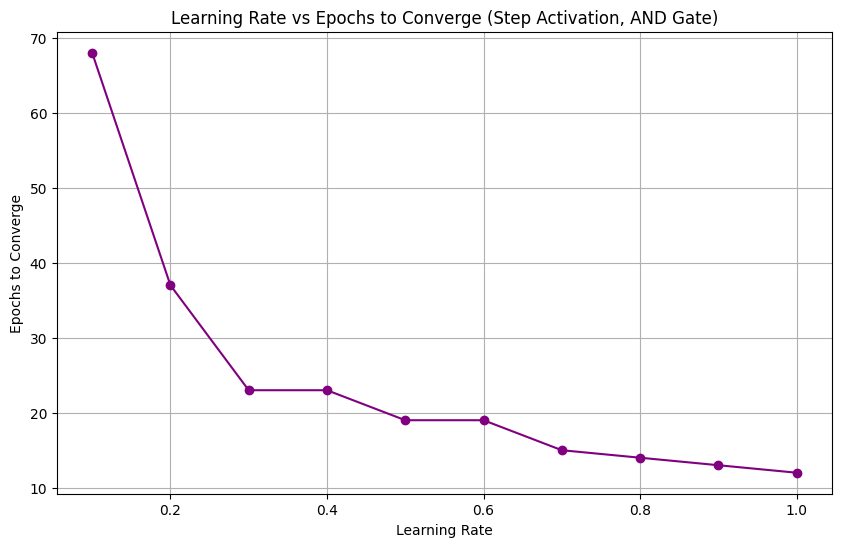

[68, 37, 23, 23, 19, 19, 15, 14, 13, 12]

In [ ]:
import matplotlib.pyplot as plt

inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
targets = [0, 0, 0, 1]

def summation_unit(inputs, weights, bias):
    return sum(i * w for i, w in zip(inputs, weights)) + bias

def step_function(x):
    return 1 if x >= 0 else 0

initial_weights = [0.2, -0.75]
initial_bias = 10
learning_rates = [i / 10 for i in range(1, 11)]
max_epochs = 100

convergence_epochs = []

for lr in learning_rates:
    weights = initial_weights[:]
    bias = initial_bias
    for epoch in range(1, max_epochs + 1):
        error_count = 0
        for inp, target in zip(inputs, targets):
            summation = summation_unit(inp, weights, bias)
            output = step_function(summation)
            error = target - output
            if error != 0:
                weights = [w + lr * error * i for w, i in zip(weights, inp)]
                bias += lr * error
                error_count += 1
        if error_count == 0:
            convergence_epochs.append(epoch)
            break
    else:
        convergence_epochs.append(max_epochs)

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, convergence_epochs, marker='o', linestyle='-', color='purple')
plt.title('Learning Rate vs Epochs to Converge (Step Activation, AND Gate)')
plt.xlabel('Learning Rate')
plt.ylabel('Epochs to Converge')
plt.grid(True)
plt.show()

convergence_epochs

**QUESTION 5.**

Repeat the above exercises, A1 to A3, for XOR gate logic.

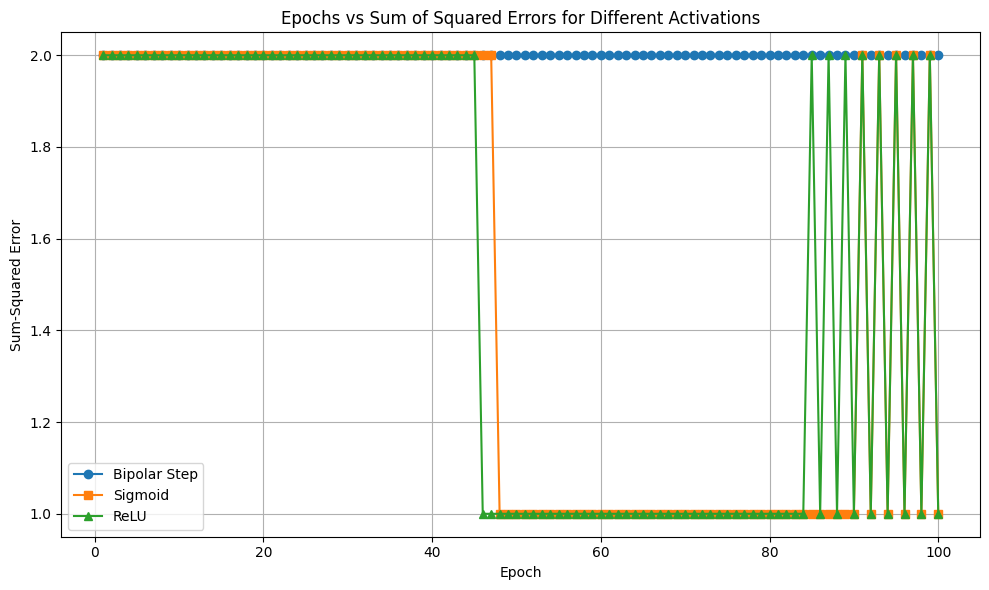

(100, 100, 100)

In [ ]:
def bipolar_step(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return max(0, x)

def train_perceptron_custom_activation(activation_fn, threshold_fn=None, learning_rate=0.05, max_epochs=100):
    inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
    targets = [0, 1, 1, 0]
    w = [10, 0.2, -0.75]
    epoch_errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for x, target in zip(inputs, targets):
            weighted_sum = w[0] + w[1]*x[0] + w[2]*x[1]
            activated_output = activation_fn(weighted_sum)
            output = activated_output
            if threshold_fn:
                output = threshold_fn(activated_output)

            error = target - output
            total_error += error ** 2

            w[0] += learning_rate * error
            w[1] += learning_rate * error * x[0]
            w[2] += learning_rate * error * x[1]

        epoch_errors.append(total_error)
        if total_error == 0:
            break

    return w, epoch_errors, epoch + 1

bipolar_w, bipolar_errors, bipolar_epochs = train_perceptron_custom_activation(activation_fn=bipolar_step)
sigmoid_w, sigmoid_errors, sigmoid_epochs = train_perceptron_custom_activation(activation_fn=sigmoid, threshold_fn=lambda x: 1 if x >= 0.5 else 0)
relu_w, relu_errors, relu_epochs = train_perceptron_custom_activation(activation_fn=relu, threshold_fn=lambda x: 1 if x >= 0.5 else 0)

plt.figure(figsize=(10, 6))
plt.plot(range(1, bipolar_epochs + 1), bipolar_errors, label="Bipolar Step", marker='o')
plt.plot(range(1, sigmoid_epochs + 1), sigmoid_errors, label="Sigmoid", marker='s')
plt.plot(range(1, relu_epochs + 1), relu_errors, label="ReLU", marker='^')
plt.title("Epochs vs Sum of Squared Errors for Different Activations")
plt.xlabel("Epoch")
plt.ylabel("Sum-Squared Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

bipolar_epochs, sigmoid_epochs, relu_epochs

**QUESTION 6.**

Use customer data provided below. Build a perceptron & learn to classify the transactions as
high or low value as provided in the below table. Use sigmoid as the activation function. Initialize the
weights & learning rate with your choice.

Final Weights:
 [[0.03611758]
 [3.11729016]
 [0.24158915]
 [2.94290001]]
Final Bias:
 [1.25002313]
Accuracy: 100.00%


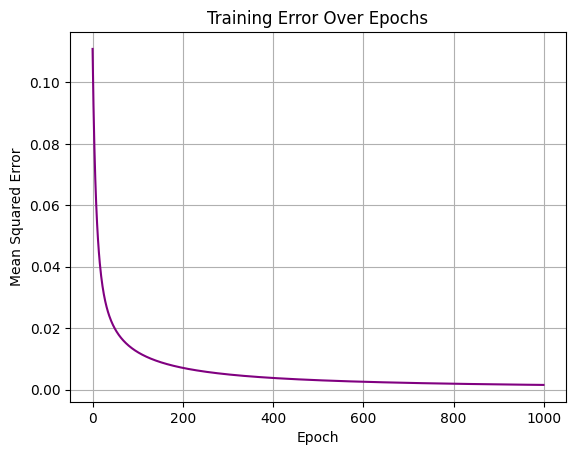

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

data = pd.read_excel("Ml_Lab_8_Customer_Data.xlsx")
data = data.drop(columns=["Customer"])

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0).values.reshape(-1, 1)


X = (X - X.mean(axis=0)) / X.std(axis=0)

np.random.seed(42)
weights = np.random.rand(X.shape[1], 1)
bias = np.random.rand(1)
learning_rate = 0.1
epochs = 1000
errors = []

for epoch in range(epochs):
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)

    error = y - predictions
    total_error = np.mean(error ** 2)
    errors.append(total_error)

    d_pred = error * sigmoid_derivative(predictions)
    weights += learning_rate * np.dot(X.T, d_pred)
    bias += learning_rate * np.sum(d_pred)

final_preds = (predictions >= 0.5).astype(int)

accuracy = np.mean(final_preds == y) * 100

print("Final Weights:\n", weights)
print("Final Bias:\n", bias)
print(f"Accuracy: {accuracy:.2f}%")

plt.plot(range(epochs), errors, color='purple')
plt.title("Training Error Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

**QUESTION 7.**

Compare the results obtained from above perceptron learning to the ones obtained with matrix
pseudo-inverse.

Accuracy (Pseudo-Inverse Method): 90.00%
Accuracy (Perceptron Learning Method): 100.00%


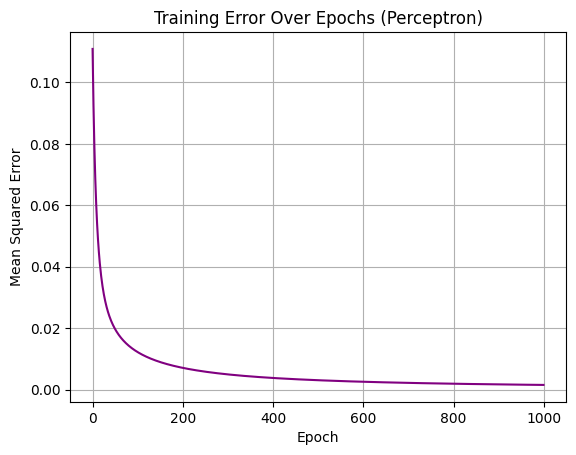

In [ ]:
data = pd.read_excel("Ml_Lab_8_Customer_Data.xlsx")
data = data.drop(columns=["Customer"])

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0).values.reshape(-1, 1)

X = (X - X.mean(axis=0)) / X.std(axis=0)

X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

weights_pseudo_inv = np.linalg.pinv(X_bias).dot(y)

predictions_pseudo_inv = sigmoid(X_bias.dot(weights_pseudo_inv))
final_preds_pseudo_inv = (predictions_pseudo_inv >= 0.5).astype(int)

accuracy_pseudo_inv = np.mean(final_preds_pseudo_inv == y) * 100
print(f"Accuracy (Pseudo-Inverse Method): {accuracy_pseudo_inv:.2f}%")

np.random.seed(42)
weights = np.random.rand(X.shape[1], 1)
bias = np.random.rand(1)
learning_rate = 0.1
epochs = 1000
errors = []

for epoch in range(epochs):
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)

    error = y - predictions
    total_error = np.mean(error ** 2)
    errors.append(total_error)

    d_pred = error * sigmoid_derivative(predictions)
    weights += learning_rate * np.dot(X.T, d_pred)
    bias += learning_rate * np.sum(d_pred)

final_preds = (predictions >= 0.5).astype(int)

accuracy_perceptron = np.mean(final_preds == y) * 100

print(f"Accuracy (Perceptron Learning Method): {accuracy_perceptron:.2f}%")

plt.plot(range(epochs), errors, color='purple')
plt.title("Training Error Over Epochs (Perceptron)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

**QUESTION 8.**

Develop the below Neural Network. Use learning rate (α) = 0.05 with a Sigmoid activation
function. Learn the weights of the network using back-propagation algorithm to implement above
provided AND gate logic.
(Note: Learning is said to be converged if the error is less than or equal to 0.002. Stop the learning
after 1000 iterations if the convergence error condition is not met. Logic for back-propagation is
provided below.)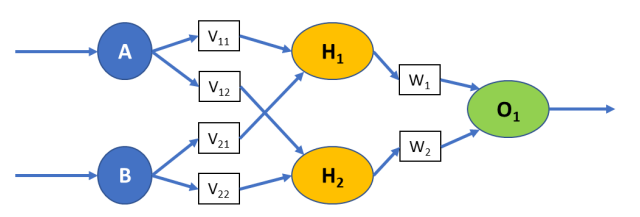

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

y = np.array([[0], [0], [0], [1]])

np.random.seed(42)

v = np.random.uniform(-1, 1, (2, 2))
w = np.random.uniform(-1, 1, (2, 1))

alpha = 0.05

for epoch in range(1000):
    total_error = 0
    for i in range(4):
        a, b = X[i]
        input_layer = np.array([a, b])

        hidden_input = np.dot(input_layer, v)
        hidden_output = sigmoid(hidden_input)

        final_input = np.dot(hidden_output, w)
        final_output = sigmoid(final_input)

        target = y[i]
        error = 0.5 * (target - final_output) ** 2
        total_error += error

        delta_output = (target - final_output) * sigmoid_derivative(final_output)
        delta_hidden = sigmoid_derivative(hidden_output) * (delta_output @ w.T)

        w += alpha * hidden_output.reshape(2, 1) * delta_output
        v += alpha * np.outer(input_layer, delta_hidden)

    if total_error <= 0.002:
        print(f"Converged at epoch {epoch}")
        break

print("\nFinal Weights (v):\n", v)
print("\nFinal Weights (w):\n", w)
print("\nAND Gate Predictions:")
for i in range(4):
    input_layer = X[i]
    hidden_output = sigmoid(np.dot(input_layer, v))
    final_output = sigmoid(np.dot(hidden_output, w))
    print(f"Input: {X[i]} => Output: {final_output[0]:.4f}")


Final Weights (v):
 [[-1.25960291  0.15297744]
 [-0.50659643 -0.568267  ]]

Final Weights (w):
 [[-1.96362497]
 [-0.83171408]]

AND Gate Predictions:
Input: [0 0] => Output: 0.1982
Input: [0 1] => Output: 0.2613
Input: [1 0] => Output: 0.2928
Input: [1 1] => Output: 0.3504


**QUESTION 9.**

Repeat the above A1 experiment for XOR Gate logic. Keep the learning rate & activation function
same as A1.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

y = np.array([[0], [1], [1], [0]])

np.random.seed(42)

v = np.random.uniform(-1, 1, (2, 2))
w = np.random.uniform(-1, 1, (2, 1))

alpha = 0.05

for epoch in range(1000):
    total_error = 0
    for i in range(4):
        a, b = X[i]
        input_layer = np.array([a, b])

        hidden_input = np.dot(input_layer, v)
        hidden_output = sigmoid(hidden_input)

        final_input = np.dot(hidden_output, w)
        final_output = sigmoid(final_input)

        target = y[i]
        error = 0.5 * (target - final_output) ** 2
        total_error += error

        delta_output = (target - final_output) * sigmoid_derivative(final_output)
        delta_hidden = sigmoid_derivative(hidden_output) * (delta_output @ w.T)

        w += alpha * hidden_output.reshape(2, 1) * delta_output
        v += alpha * np.outer(input_layer, delta_hidden)

    if total_error <= 0.002:
        print(f"Converged at epoch {epoch}")
        break

print("\nFinal Weights (v):\n", v)
print("\nFinal Weights (w):\n", w)
print("\nXOR Gate Predictions:")
for i in range(4):
    input_layer = X[i]
    hidden_output = sigmoid(np.dot(input_layer, v))
    final_output = sigmoid(np.dot(hidden_output, w))
    print(f"Input: {X[i]} => Output: {final_output[0]:.4f}")


Final Weights (v):
 [[-0.30834282  0.85343764]
 [ 0.40412537  0.13321346]]

Final Weights (w):
 [[-0.08194887]
 [ 0.07006501]]

XOR Gate Predictions:
Input: [0 0] => Output: 0.4985
Input: [0 1] => Output: 0.4971
Input: [1 0] => Output: 0.5036
Input: [1 1] => Output: 0.5020


**QUESTION 10.**

Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate
maps to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1].
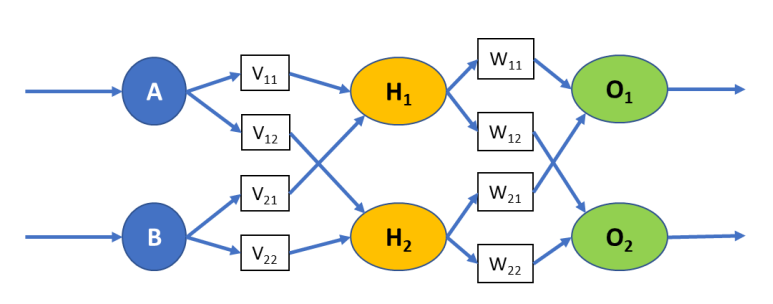

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

dataset = [([0, 0], [1, 0]), ([0, 1], [1, 0]), ([1, 0], [1, 0]), ([1, 1], [0, 1])]

np.random.seed(42)

v = np.random.uniform(-1, 1, (2, 2))
w = np.random.uniform(-1, 1, (2, 2))

alpha = 0.05

for epoch in range(1000):
    total_error = 0
    for x, target in dataset:
        x = np.array(x)
        target = np.array(target)

        hidden_input = np.dot(x, v)
        hidden_output = sigmoid(hidden_input)

        final_input = np.dot(hidden_output, w)
        final_output = sigmoid(final_input)

        error = 0.5 * np.sum((target - final_output) ** 2)
        total_error += error

        delta_output = (target - final_output) * sigmoid_derivative(final_output)
        delta_hidden = sigmoid_derivative(hidden_output) * np.dot(delta_output, w.T)

        w += alpha * np.outer(hidden_output, delta_output)
        v += alpha * np.outer(x, delta_hidden)

    if total_error <= 0.002:
        print(f"Converged at epoch {epoch}")
        break

print("\nFinal Weights (v):\n", v)
print("\nFinal Weights (w):\n", w)
print("\nAND Gate Dual Output Predictions:")
for x, target in dataset:
    hidden_output = sigmoid(np.dot(x, v))
    final_output = sigmoid(np.dot(hidden_output, w))
    print(f"Input: {x} => Output: [{final_output[0]:.4f}, {final_output[1]:.4f}]")


Final Weights (v):
 [[-1.45230872  0.29833716]
 [-0.76539811 -0.44011326]]

Final Weights (w):
 [[ 2.15501864 -2.86233816]
 [ 0.71249223 -0.27908734]]

AND Gate Dual Output Predictions:
Input: [0, 0] => Output: [0.8075, 0.1721]
Input: [0, 1] => Output: [0.7238, 0.2654]
Input: [1, 0] => Output: [0.6937, 0.3311]
Input: [1, 1] => Output: [0.6324, 0.3988]


**QUESTION 11.**

Learn using a MLP network from Sci-Kit manual available at https://scikitlearn.org/stable/modules/neural_networks_supervised.html. Repeat the AND Gate and XOR Gate
exercises using MLPClassifier() function.

In [ ]:
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

mlp_and = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=42)
mlp_and.fit(X_and, y_and)

y_pred_and = mlp_and.predict(X_and)

print("Predictions for AND Gate:", y_pred_and)
print("Accuracy for AND Gate:", accuracy_score(y_and, y_pred_and))


X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=42)
mlp_xor.fit(X_xor, y_xor)

y_pred_xor = mlp_xor.predict(X_xor)

print("Predictions for XOR Gate:", y_pred_xor)
print("Accuracy for XOR Gate:", accuracy_score(y_xor, y_pred_xor))

Predictions for AND Gate: [0 0 0 1]
Accuracy for AND Gate: 1.0
Predictions for XOR Gate: [1 1 1 1]
Accuracy for XOR Gate: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


**QUESTION 12.**

Use the MLPClassifier() function on your project dataset.


In [ ]:
df = pd.read_csv('wine_data.csv')

X = df.drop(columns=['class']).values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
